# Programming Exercise 8 - Anomaly Detection and Recommender Systems

In [5]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

# config matplotlib inline
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

## Anomaly Detection

In [6]:
data1 = loadmat('data/ex8data1.mat')
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [7]:
X1 = data1['X']
print('X1:', X1.shape)

X1: (307, 2)


Text(0, 0.5, 'Throughput (mb/s)')

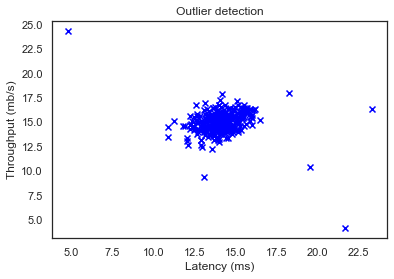

In [11]:
plt.scatter(X1[:,0], X1[:,1], c='b', marker='x')
plt.title('Outlier detection')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')

In [9]:
clf = EllipticEnvelope()
clf.fit(X1)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
                 store_precision=True, support_fraction=None)

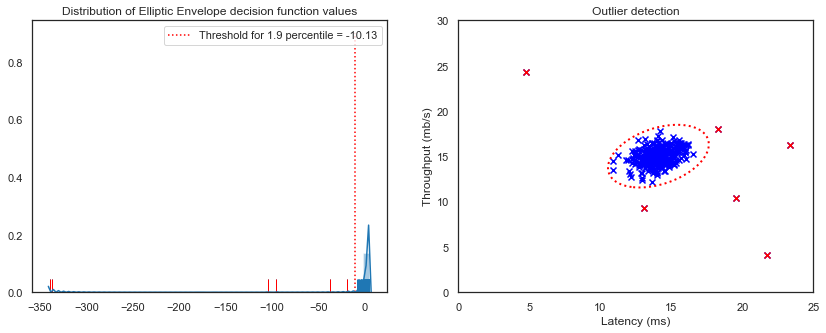

In [12]:
# Create the grid for plotting
xx, yy = np.meshgrid(np.linspace(0, 25, 200), np.linspace(0, 30, 200))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Calculate the decision function and use threshold to determine outliers
y_pred = clf.decision_function(X1).ravel()
percentile = 1.9
threshold = np.percentile(y_pred, percentile)
outliers = y_pred < threshold

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

# Left plot
# Plot the decision function values
sns.distplot(y_pred, rug=True, ax=ax1)
# Plot the decision function values for the outliers in red
sns.distplot(y_pred[outliers], rug=True, hist=False, kde=False, norm_hist=True, color='r', ax=ax1)
ax1.vlines(threshold, 0, 0.9, colors='r', linestyles='dotted',
           label='Threshold for {} percentile = {}'.format(percentile, np.round(threshold, 2)))
ax1.set_title('Distribution of Elliptic Envelope decision function values');
ax1.legend(loc='best')

# Right plot
# Plot the observations
ax2.scatter(X1[:,0], X1[:,1], c='b', marker='x')
# Plot outliers
ax2.scatter(X1[outliers][:,0], X1[outliers][:,1], c='r', marker='x', linewidths=2)
# Plot decision boundary based on threshold
ax2.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors='red', linestyles='dotted')
ax2.set_title("Outlier detection")
ax2.set_xlabel('Latency (ms)')
ax2.set_ylabel('Throughput (mb/s)');

### Recommender Systems

In [13]:
data2 = loadmat('data/ex8_movies.mat')
data2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Y', 'R'])

In [14]:
Y = data2['Y']
R = data2['R']
print('Y:', Y.shape)
print('R:', R.shape)

Y: (1682, 943)
R: (1682, 943)


In [15]:
Y

array([[5, 4, 0, ..., 5, 0, 0],
       [3, 0, 0, ..., 0, 0, 5],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [16]:
R

array([[1, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

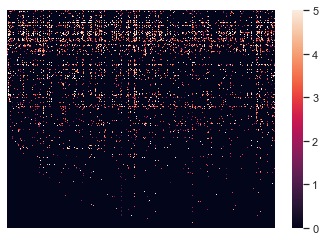

In [18]:
sns.heatmap(Y, yticklabels=False, xticklabels=False)